## Objective:
The purpose of this data analysis project is to investigate the observed high employee attrition at a motor manufacturing company. The Human Resource team has conducted a comprehensive survey, gathering data from both current and former employees. As a Data Analyst, my task is to analyze this data meticulously and extract valuable insights. These insights will serve as a basis for enhancing existing strategies, improving working conditions for current employees, and refining the recruitment and training processes for new employees.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df0 = pd.read_csv("Human Resources Survey.csv")
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
print("Information about the dataset:")
print(df0.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [4]:
print("Missing values in the dataset:")
print(df0.isnull().sum())

Missing values in the dataset:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


As we can see, there are no missing values in the dataset

In [5]:
print("Checking the list of unique values present in Salary column:")
print(df0['salary'].unique())

Checking the list of unique values present in Salary column:
['low' 'medium' 'high']


In [6]:
print("Checking the list of unique values present in Department column:")
print(df0['Department'].unique())

Checking the list of unique values present in Department column:
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [7]:
print("Description of the data:")
df0.describe()

Description of the data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Giving columns shorter and more relevant names
df0.rename(columns={ "number_project":"number_of_projects", "average_montly_hours":"monthly_working_hours", "time_spend_company":"tenure", "Work_accident": "work_accident", "Department": "department", "promotion_last_5years":"promotion" }, inplace=True)
df0.head(5)

,satisfaction_level,last_evaluation,number_of_projects,monthly_working_hours,tenure,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The Data has following columns-
1. satisfaction_level - Satisfaction Level
2. last_evaluation - Rating received by the employee during last evaluation
3. number_of_projects - Number of projects employee works on
4. monthly_working_hours - Average number of hours employee works every month
5. tenure - How many years the employee has been working in the company
6. work_accident - Whether or not the employee faced an accident at work
7. left - Whether or not the employee has left the company
8. promotion - Whether or not the employee has received a promotion in the last 5 years
9. department - Department of the employee
10. salary - Salary bracket of the employee

In [9]:
# Check for duplicates
duplicate_rows = df0.duplicated()
print("Number of puplicate rows: ", len(df0[duplicate_rows]))
df0[duplicate_rows]

Number of puplicate rows:  3008


,satisfaction_level,last_evaluation,number_of_projects,monthly_working_hours,tenure,work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Since there are 3008 duplicate rows, redundant data should be dropped.

In [10]:
# Drop duplicates
df = df0.drop_duplicates(inplace=False)
df.head(10)

,satisfaction_level,last_evaluation,number_of_projects,monthly_working_hours,tenure,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
df.describe()

,satisfaction_level,last_evaluation,number_of_projects,monthly_working_hours,tenure,work_accident,left,promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In order to detect Outliers, we will compare the following-
1) If min is drastically lower than 25% value, then there might be outliers
2) If max is drastically higher than 75% value, then there might be outliers

From the above data for tenure, the max value (10 years) is drastically higher than the 75% (4 years).
Hence, tenure needs to be analysed to find outliers

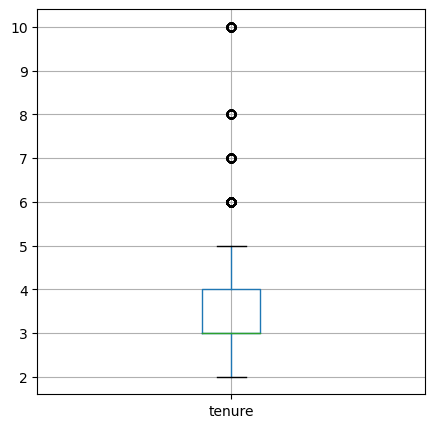

In [12]:
# Checking for Outliers
df_temp = df_temp = pd.DataFrame(df["tenure"])
boxplot = df_temp.boxplot(figsize = (5,5))

In a box plot,
Values above the upper extreme and below the lower extreme are considered outliers. 
Since there are points beyond the extreme lines, they are outliers and need to be dropped.

In [13]:
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

upper_extreme = Q3 + 1.5 * IQR
lower_extreme = Q1 - 1.5 * IQR

print("Extremes: ",lower_extreme," - ",upper_extreme)

df_outliers = df[(df["tenure"] > upper_extreme) | (df["tenure"] < lower_extreme)]

print("Number of Outliers :",len(df_outliers))

df_cleaned = df[(df["tenure"] <= upper_extreme) & (df["tenure"] >= lower_extreme)]
df_cleaned.head(5)

Extremes:  1.5  -  5.5
Number of Outliers : 824


,satisfaction_level,last_evaluation,number_of_projects,monthly_working_hours,tenure,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [14]:
# Adding New column to count rows
df_cleaned["count"] = 1

# Compare Number of People who have Stayed vs Left
total = len(df_cleaned)
people_left = len(df_cleaned[ df["left"]==1 ])
people_stayed = len(df_cleaned[ df["left"]==0 ])

print("Number of people who Left :",people_left)
print("Number of people who Stayed :",people_stayed)

# Get percentages of people who left vs. stayed
print("Stayed %:",round(100*people_stayed/total,1))
print("Left %:",round(100*people_left/total,1))

Number of people who Left : 1882
Number of people who Stayed : 9285
Stayed %: 83.1
Left %: 16.9


/var/folders/6m/j_g8w1wd6r598z82m7rphyc40000gn/T/ipykernel_2623/3422020124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["count"] = 1
/var/folders/6m/j_g8w1wd6r598z82m7rphyc40000gn/T/ipykernel_2623/3422020124.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  people_left = len(df_cleaned[ df["left"]==1 ])
/var/folders/6m/j_g8w1wd6r598z82m7rphyc40000gn/T/ipykernel_2623/3422020124.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  people_stayed = len(df_cleaned[ df["left"]==0 ])


Considering the dataset, possible reasons of an employee leaving-
1) Low salary
2) No promotions
3) Bad Department
4) High working hours
5) Faced Accidents at work
6) Unable to co-op up with the company (low ratings)
7) Working in the same company for long and looking for a change
8) Has very less projects
9) Low Satisfaction

Now we will analyse attrition based on these factors, and observe the trends.
We will plot visualizations which will help us to analyse the trends better.

Out of these factors, some of the columns have discrete or categorical values. For them, we need to plot a bar graph.
Whereas, some values are continuous. For them, we need to plot a histogram.

Discrete/Categorical: 
Salary, Promotions, Department, Accidents

Continuous:
Working Hours, Evaluation Ratings, Tenure, Projects, Satisfaction

In [15]:
# Function to calculate Stay vs Left percentages for categopries and plot bar charts
def plotAttritionBarGraph(df, groupingColumn):
    total_records = len(df)
    df_counts = df.groupby(groupingColumn).agg(total_count=("count", "sum"), left_count=("left", "sum"))
    df_counts.reset_index(inplace=True)
    df_counts["stay_count"]=df_counts["total_count"]-df_counts["left_count"]
    df_counts['left_percentage']=100*df_counts['left_count']/df_counts['total_count']
    df_counts['stay_percentage']=100*df_counts['stay_count']/df_counts['total_count']
    
    plt.figure(figsize=(6, 6))
    bar_width = 0.1
    positions = range(len(df_counts[groupingColumn]))
    left_bars = plt.bar(positions, df_counts['left_percentage'], width=bar_width, label='Left %')
    total_bars = plt.bar([pos + bar_width for pos in positions], df_counts['stay_percentage'], width=bar_width, label='Stay %')

    plt.xlabel(groupingColumn)
    plt.ylabel('Count')
    plt.title('Employee Attrition by '+groupingColumn)
    plt.xticks([pos + bar_width / 2 for pos in positions], df_counts[groupingColumn], rotation=45)

    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    autolabel(left_bars)
    autolabel(total_bars)
    plt.legend()
    plt.tight_layout()
    plt.show()

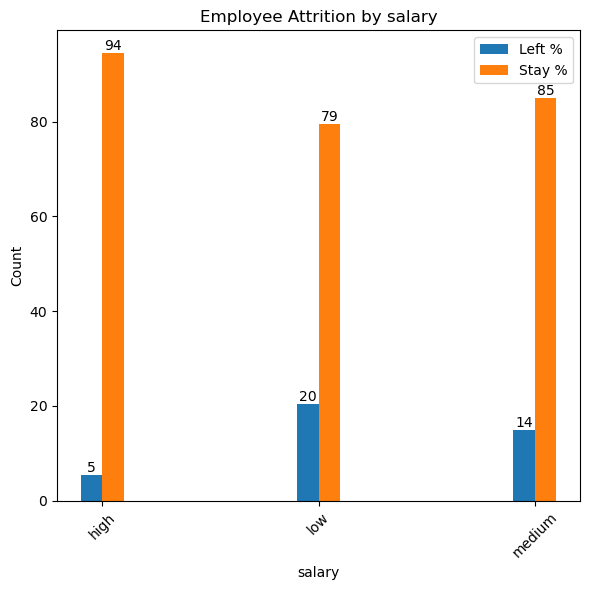

In [16]:
# Bar graph for salary
plotAttritionBarGraph(df_cleaned, 'salary')

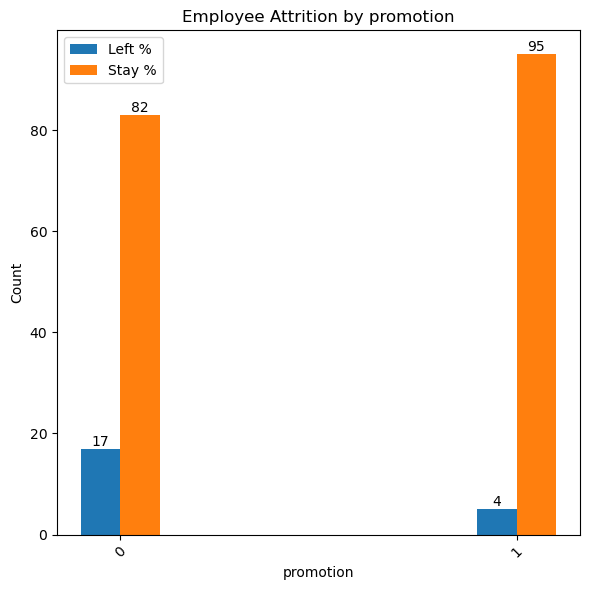

In [17]:
# Bar graph for promotion
plotAttritionBarGraph(df_cleaned, 'promotion')

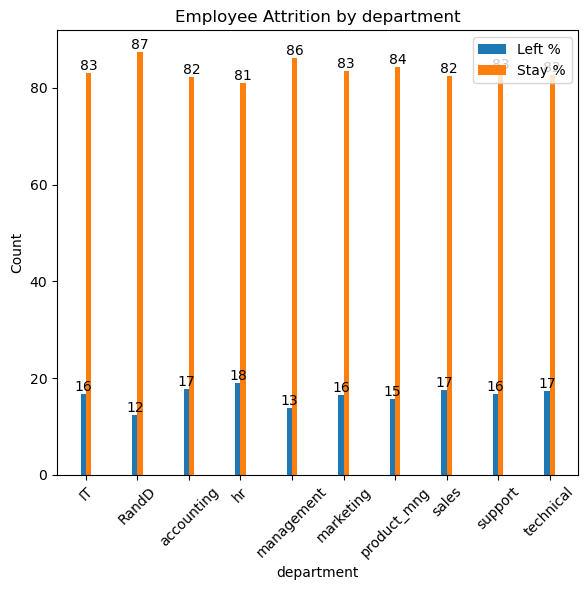

In [18]:
# Bar graph for department
plotAttritionBarGraph(df_cleaned, 'department')

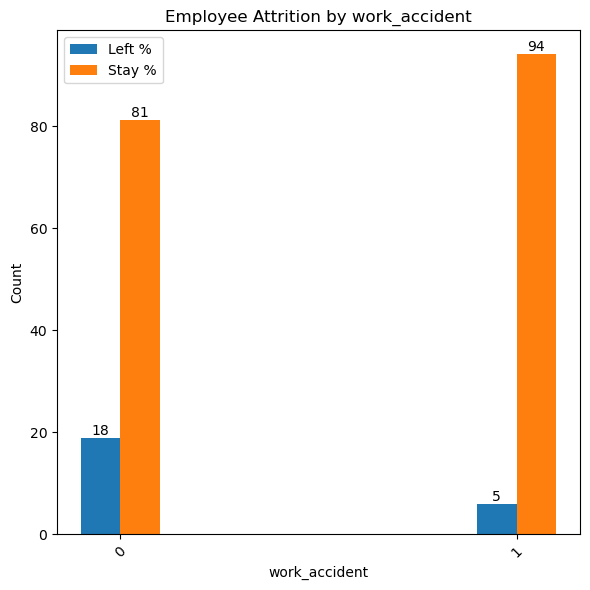

In [19]:
# Bar graph for work_accident
plotAttritionBarGraph(df_cleaned, 'work_accident')

### Observations from bar charts-
1) Salary-
High salary employees are less likely to leave. 
Low salary employees are more likely to leave.

2) Promotions-
People who did not receive promotions are more likely to leave.

3) Department-
Employees from RandD and Management are less likely to leave.

4) Accidents-
Employees who faced accidents are less likely to leave.

In [20]:
# Function to plot Histograms to observe trends of people who have left
def plotAttritionHistograms(df, continuousColumn):
    print("Report for",continuousColumn)
    df_left = df[ df["left"]==1 ]
    df_left[continuousColumn].hist()
    plt.show()

Report for monthly_working_hours


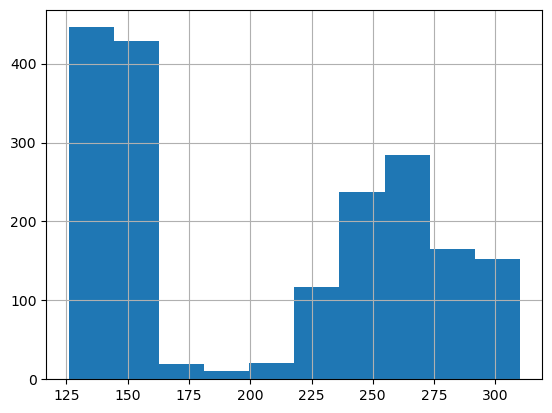

In [21]:
plotAttritionHistograms(df_cleaned, 'monthly_working_hours')

Report for last_evaluation


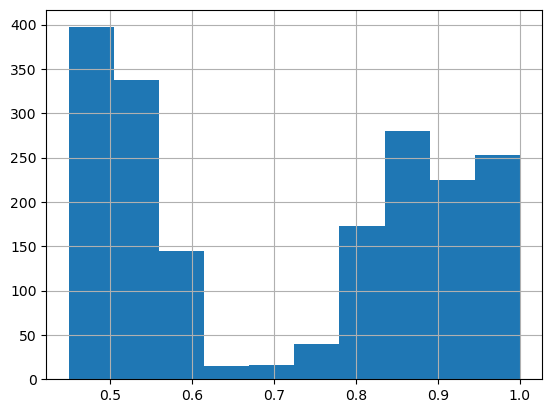

In [22]:
plotAttritionHistograms(df_cleaned, 'last_evaluation')

Report for tenure


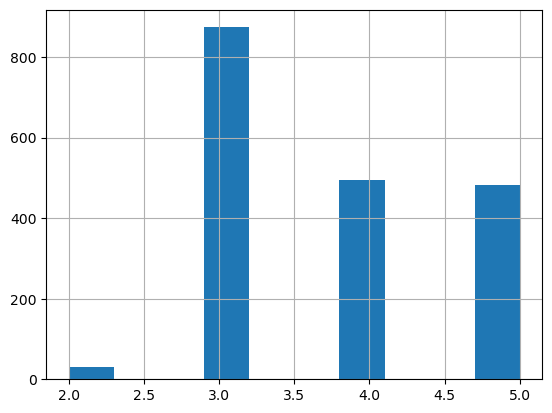

In [23]:
plotAttritionHistograms(df_cleaned, 'tenure')

Report for number_of_projects


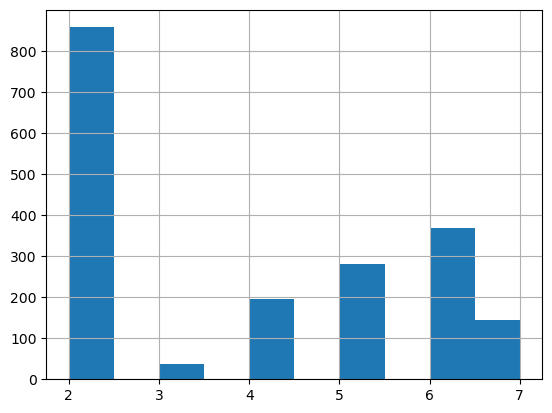

In [24]:
plotAttritionHistograms(df_cleaned, 'number_of_projects')

Report for satisfaction_level


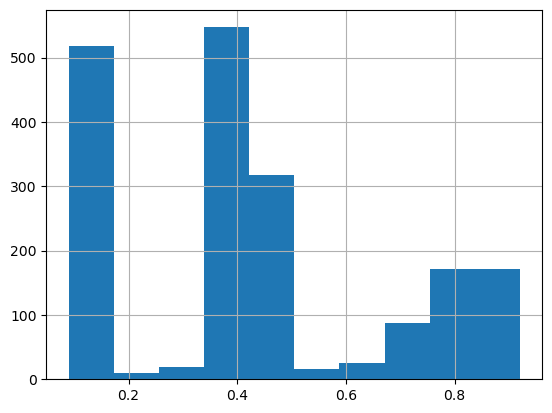

In [25]:
plotAttritionHistograms(df_cleaned, 'satisfaction_level')

### Observations from Histograms-
1) monthly_working_hours:
People with monthly working hours below ~160 and above ~225 are more likely to leave.

2) last_evaluation:
People with ratings below ~0.55 and above ~0.85 are more likely to leave.

3) tenure:
People with tenures between 3-5 years are more likely to leave.

4) number_of_projects:
People with single project are more likely to leave.

5) satisfaction_level:
No clear observation from satisfaction_level.

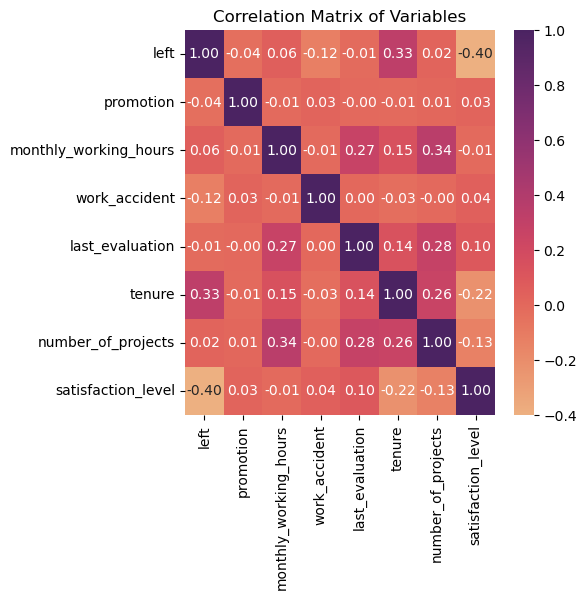

In [26]:
new_df_cleaned = df_cleaned[ ["left","promotion","monthly_working_hours","work_accident","last_evaluation","tenure","number_of_projects","satisfaction_level"] ]

corr_matrix = new_df_cleaned.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

### Observations from Heatmap-
1) Moderate Negative Correlation- Employees Left and satisfaction level.
2) Moderate Positive Correlation - Number of projects and Working hours.
3) Moderate Positive Correlation - Number of projects and Last evaluation.
4) Moderate Positive Correlation - Working hours and Last evaluation.
5) Weak Positive Correlation - Time spent in company and Number of projects.

Now we will build a tree based model to predict whether an employee is likely to leave or not.

In [27]:
# Label encoding for Department and Salary
label_encoder = LabelEncoder()
df_cleaned.head()
df_cleaned['encoded_department'] = label_encoder.fit_transform(df_cleaned['department'])
df_cleaned['encoded_salary'] = label_encoder.fit_transform(df_cleaned['salary'])
df_cleaned.head()

/var/folders/6m/j_g8w1wd6r598z82m7rphyc40000gn/T/ipykernel_2623/2900565515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['encoded_department'] = label_encoder.fit_transform(df_cleaned['department'])
/var/folders/6m/j_g8w1wd6r598z82m7rphyc40000gn/T/ipykernel_2623/2900565515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['encoded_salary'] = label_encoder.fit_transform(df_cleaned['salary'])


,satisfaction_level,last_evaluation,number_of_projects,monthly_working_hours,tenure,work_accident,left,promotion,department,salary,count,encoded_department,encoded_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,7,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,7,1
5,0.41,0.50,2,153,3,0,1,0,sales,low,1,7,1


In [28]:
# Selecting relevant features
dataset_for_model = df_cleaned[ ['satisfaction_level','last_evaluation', 'number_of_projects', 'monthly_working_hours', 'tenure', 'work_accident', 'left', 'promotion', 'encoded_department', 'encoded_salary'] ]

# Splitting dataset into train and test
x = dataset_for_model.drop(columns=['left'])
y = dataset_for_model['left']
xTrain, xTest, yxTrain, yxTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
# Fitting
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(xTrain , yxTrain)
y_pred = regressor.predict(xTest)

In [30]:
# Result Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(yxTest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yxTest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yxTest, y_pred)))

Mean Absolute Error: 0.037332139659803046
Mean Squared Error: 0.0229632945389436
Root Mean Squared Error: 0.15153644623965418
